
# **Atelier 'Traitement automatique des langues avec Spacy'**

Préparé par [Mikhail Biriuchinskii](https://www.linkedin.com/in/mikhail-biriuchinskii/), l'équipe ObTIC.

>[Atelier 'Traitement automatique des langues avec Spacy'](#scrollTo=8f6Lf--Gr9Bs)

>[Le Pipeline de Base : spacy.blank() et la Tokénisation](#scrollTo=RJpdI4a0Z0T-)

>>[Tokénization](#scrollTo=3NXDD0BJJCK-)

>>>[🔍 À vous de jouer !](#scrollTo=7hR195f8YWKh)

>>[La Segmentation en Phrases](#scrollTo=gYGQPy82JL3X)

>[Application Pratique : Analyse du livre de Céline](#scrollTo=a6V3uUC0Ek4D)

>>>[🔍 À vous de jouer !](#scrollTo=bB66nodH8AmS)

>>[Filtrer les Tokens : Affiner le Décompte des Mots](#scrollTo=jN4nL5NrOK4X)

>>>[🔍 À vous de jouer !](#scrollTo=cHQBFxSUQBMM)

>[Les Pipelines Pré-entraînés : spacy.load()](#scrollTo=sPCAid_oZ6kw)

>>>[🔍 À vous de jouer !](#scrollTo=1n4jtdCXVhRw)

>>[Exploration des Annotations Linguistiques](#scrollTo=DnffVM0-5snN)

>>>[Lemmatization](#scrollTo=pIEC7fy_cHQR)

>>>[Pos-tagging et morphologie](#scrollTo=ZT0thVM4aDrR)

>>>[🔍 À vous de jouer !](#scrollTo=V2KQ0NOdKgs3)

>>>[Analyse léxicométrique du texte](#scrollTo=SLNLUxRkUBy3)

>>>[🔍 À vous de jouer !](#scrollTo=UFcoQpB_Qj9R)

>>[Visualisation : L'Analyse de Dépendance avec DisplaCy](#scrollTo=8A5ZL1OCtty5)

>>[Reconnaissance d'Entités Nommées (NER)](#scrollTo=Do-dcWv6tV6l)

>>>[🔍 À vous de jouer !](#scrollTo=xnW8JAWmoPLe)

>[Recherche de Motifs : Le Matcher](#scrollTo=9H0h6kGZtqXW)

>>>[🔍 À vous de jouer !](#scrollTo=21uND5Eky1Oq)

>>>[🔍 À vous de jouer !](#scrollTo=QrY3kyRfT_5N)

>[Word Embeddings : comprendre les relations entre les mots](#scrollTo=QAWrKRcV5v6L)

>>[Doc.similarity() : mesurer la proximité sémantique](#scrollTo=tllyzXKE-xr8)

>>>[🔍 À vous de jouer !](#scrollTo=IUQ666th_fPn)

>[Bonus : Personnalisation segmentation de spaCy pour une langue peu dotée : le Saramaca](#scrollTo=PdK76GGsTZ_0)

>>[Modèles statistiques vs. modèle vide](#scrollTo=PdK76GGsTZ_0)

>[Ressources](#scrollTo=vXObLhyM4jZB)



**CONFIGURATION DE VOTRE ENVIRONNEMENT DE TRAVAIL**

Avant de commencer à utiliser spaCy, vous devez configurer un environnement de travail en installant les éléments suivants sur votre machine :

- Python 3.4 ou version ultérieure

- La bibliothèque spaCy

- Un modèle statistique pour spaCy


Dans l'environement Google Colab, il suffit d'executer les cellules.


In [ ]:
# Executer la cellule

! pip install -U spacy

import spacy

# Le Pipeline de Base : spacy.blank() et la Tokénisation

---



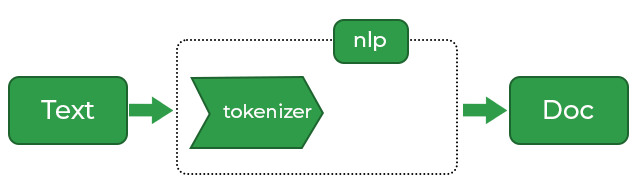



- Suite de composants appliqués sur le Doc

- Le tokenizer s’exécute toujours en premier

- Composants : modèles statistiques ou règles

- Composants intégrés + possibilité d’ajouts personnalisés


Voir plus:

https://spacy.io/api


## Tokénization

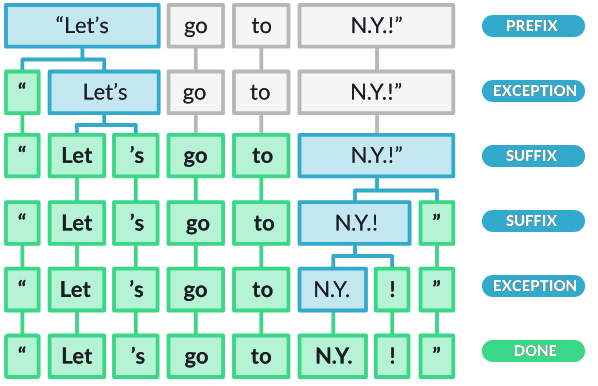

In [ ]:
texte = "Aujourd'hui, j'ai mangé plein de pommes de terre à L.A."

# Crée un objet nlp français vide
nlp = spacy.blank("fr")

doc = nlp(texte)

print([(token.text, token.idx) for token in doc])
print("Ce texte contient", len(doc), "tokens.")

### 🔍 À vous de jouer !

Écrivez des phrases de votre choix dans `doc = nlp(...)` et observez comment **spaCy découpe le texte en tokens** (mots, ponctuations, symboles…).

**Questions à explorer :**
- Est-ce que *1 mot = 1 token* ?
- Que se passe-t-il avec les contractions ?
- Comment sont traités les espaces ?
- La ponctuation est-elle séparée ?
- Les abréviations comme "M." ou "N.Y." sont-elles bien reconnues ?
- Comment sont traités les emojis, hashtags ou liens web ?


In [ ]:
doc = nlp("...")

print([token.text for token in doc])
print("Ce texte contient", len(doc), "tokens.")

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
doc = nlp("C'est      incroyable !")
doc = nlp("Visitez https://openai.com pour plus d'infos.")
doc = nlp("Il a dit : « Bonjour ! »")
doc = nlp("Dr. Martin habite aux U.S.A.")
doc = nlp("J'aime les emojis 😄👍 et les hashtags #NLP.")
doc = nlp("M. Dupont de Franval a déménagé à St.-Étienne.")
doc = nlp("Marie-Charlotte-Antoinette de Saint-Exupéry de la Tour du Pin présida avec grâce le bal d’hiver organisé au château de ses ancêtres.")
doc = nlp("""<p rend="small">(1) Cette opération est remplacée dans la Côte par l’usage d’un cylindre placé au-dessusde la cuve pour broyer le raisin.</p>""")



## La Segmentation en Phrases


Un token, selon le contexte, peut aussi désigner une phrase. Pour pouvoire faire cela, il nous faut utiliser la méthode .add_pipe() de l'objet Langugae (nlp).

In [ ]:
texte = "Longtemps, je me suis couché de bonne heure. Parfois, à peine ma bougie éteinte, mes yeux se fermaient si vite que je n'avais pas le temps de me dire : « Je m'endors. » Et, une demi-heure après, la pensée qu'il était temps de chercher le sommeil m'éveillait ; je voulais poser le volume que je croyais avoir encore dans les mains et souffler ma lumière ; je n'avais pas cessé en dormant de faire des réflexions sur ce que je venais de lire, mais ces réflexions avaient pris un tour un peu particulier ; il me semblait que j'étais moi-même ce dont parlait l'ouvrage : une église, un quatuor, la rivalité de François Ier et de Charles Quint. Cette croyance survivait pendant quelques secondes à mon réveil ; elle ne choquait pas ma raison mais pesait comme des écailles sur mes yeux et les empêchait de se rendre compte que le bougeoir n'était plus allumé."

# Crée un objet nlp français vide
nlp = spacy.blank("fr")

# Ajout de sentencizer component au pipeline
nlp.add_pipe('sentencizer')

doc = nlp(texte)

phrases = [sent.text for sent in doc.sents]

print("Ce texte contient", len(phrases), "phrases.")

for i, phrase in enumerate(phrases):
  print(f'Phrase # {i+1} : {phrase}')


-  Êtes-vous satisfait·es avec le résultat obtenu ?

# Application Pratique : Analyse du livre de Céline

Téléchargez le livre *Voyage au bout de la nuit* de Louis-Ferdinand Céline.



<details>
<summary>💡 Au cas où l'url ne marche pas</summary>



```python
with open(livre, "r", encoding='utf-8', errors="ignore") as f:
    content = f.read().replace('\n', ' ').replace('\xa0', '')
    content = re.sub(r'(?<!\n)\n(?!\n)', ' ', content)
    content = re.sub(r'\s+', ' ', content)


In [ ]:
# Step 1 : télécharger le livre
import requests

url = "https://archive.org/download/Celine-VoyageAuBoitDeLaNuit/celine_voyage_au_bout_de_la_nuit%5B1%5D_djvu.txt"
livre = "celine_voyage_au_bout_de_la_nuit.txt"

try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # Lève une exception si le code HTTP est une erreur (ex. 404, 500)
    with open(livre, "wb") as f:
        f.write(response.content)
    print("Le livre a été téléchargé.")
except requests.exceptions.RequestException as e:
    print(f"Une erreur est survenue lors du téléchargement : {e}")
except Exception as e:
    print(f"Une erreur inattendue est survenue : {e}")


In [ ]:
# Step 2 : ouvrire le livre et sauvegarder son contenu dans la variable 'content'
with open(livre, "r", encoding='utf-8', errors="ignore") as f:
    content = f.read()

# Step 3 : afficher 500 caractères
print(content[500:1000])

In [ ]:
content[500:1000]

In [ ]:
# Step 4 : Nettoyage du texte (cas url)
import re

# pour supprimer les numéros de pages "- 3 -" or "- 12 -" etc.
content = re.sub(r'-\s*\d+\s*-', ' ', content)
content = content.replace('\n', '') # pour supprimer les caractères de saut de ligne
content = re.sub(r'\s+', ' ', content) # pour réduire les espaces excessifs

# Fixer les mots séparés par un tiret et un espace blanc (e.g., exposi- tion → exposition)
content = re.sub(r'(\w+)-\s+(\w+)', r'\1\2', content)

content[500:1000]

### 🔍 À vous de jouer !

Votre mission est d’analyser le contenu textuel d’un livre à l’aide de spaCy. Suivez les étapes ci-dessous :

- Comptez les mots (tokens) dans le texte.

- Comptez les phrases. Pour cela, utilisez `doc.sents`, en appliquant `.text` sur chaque phrase comme pour les tokens.

👉 Pensez à ajouter un sentencizer à votre pipeline vide, car spacy.blank("fr") ne contient pas de modèle pré-entraîné.

- Comparez avec une source externe : cherchez sur Internet combien de mots ce livre contient selon une source fiable (ex. : [une page de statistiques](https://www.readinglength.com/book/BHhwHOM?utm_source=chatgpt.com) ou une fiche descriptive du livre).

- Comparez vos résultats : les chiffres sont-ils proches ? Pourquoi y a-t-il des différences ? Discutez des raisons possibles (format du texte, découpage des mots, ponctuation, etc.).

- Affichez les 100 premiers tokens et les 100 premières phrases pour illustrer comment votre analyse a été faite.



In [ ]:
# Charge un pipeline vide
nlp = spacy.blank("fr")

# Augmente la taille maximale
nlp.max_length = 1500000  #  Mettre une valeur supérieure à la longueur du texte

# Ajoute un composant pour détecter les frontières de phrases (pour lka méthode 'blank')
nlp.add_pipe("sentencizer")

doc = nlp(content)

tokens = # A VOUS DE CONTINUER

sentences = # A VOUS DE CONTINUER

print("Ce livre contient", len(tokens), "tokens.")
print("Ce livre contient", len(sentences), "phrases.")

print(tokens[:100])
print(sentences[:100])

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>
</summary>

```python
# Charge un pipeline vide
nlp = spacy.blank("fr")

# Augmente la taille maximale
nlp.max_length = 1500000  #  Mettre une valeur supérieure à la longueur du texte

# Ajoute un composant pour détecter les frontières de phrases (pour lka méthode 'blank')
nlp.add_pipe("sentencizer")

# Applique le pipeline sur le contenu textuel
doc = nlp(content)

# Compte les tokens
tokens = [token.text for token in doc]

# Récupère les phrases détectées dans le texte
sentences = [sent.text for sent in doc.sents]

# Affiche les statistiques
print("Ce livre contient", len(tokens), "tokens.")
print("Ce livre contient", len(sentences), "phrases.")

print(tokens[:100])
print(sentences[:100])


## Filtrer les Tokens : Affiner le Décompte des Mots

Comme on peut le constater, la notion de *token* varie selon le contexte. Il arrive que certains éléments indésirables restent présents dans l'objet `Language`.  

Pour pouvoir traiter uniquement les éléments jugés pertinents, il existe des méthodes de filtrage.  

| Objectif                                             | Condition de filtre                            | Ce que cela inclut                                                                | Nombre de tokens (exemple) |
| ---------------------------------------------------- | ---------------------------------------------- | --------------------------------------------------------------------------------- | -------------------------- |
| Tous les tokens (espaces, ponctuation, etc. compris) | `len(doc)`                                     | Tous les éléments tokenisés par spaCy (mots, espaces, ponctuation, nombres, etc.) | 245 298                    |
| Exclure uniquement les espaces                       | `if not token.is_space`                        | Mots, ponctuation, nombres, symboles                                              | 226 820                    |
| Exclure espaces et ponctuation                       | `if not token.is_space and not token.is_punct` | Mots, nombres, symboles (exclut espaces et ponctuation)                           | 196 040                    |
| Uniquement les mots alphabétiques purs               | `if token.is_alpha`                            | Mots composés uniquement de lettres (pas chiffres, ponctuation, apostrophes)      | 176 933                    |


### 🔍 À vous de jouer !

Expérimentez avec les méthodes de l'objet Language pour filtrer les tokens.

- Quel méthode est le plus adapté pour faire la tâche précédente ?
- Quel défauts ont chaqu'une de ces méthodes ?


In [ ]:
# Compte les tokens
tokens = [token.text for token in doc] # A CHANGER

# Récupère les phrases détectées dans le texte
sentences = [sent.text for sent in doc.sents]

# Affiche les statistiques
print("Ce livre contient", len(tokens), "tokens.")
print("Ce livre contient", len(sentences), "phrases.")

print(tokens[:100])
print(sentences[:100])

**Maintenant** vérifions les phrases ségmentées. Êtes-vous content·es des résultats ?

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>
</summary>

```python
# Compte les tokens
tokens = [token.text for token in doc if not token.is_space and not token.is_punct]

# Récupère les phrases détectées dans le texte
raw_sentences = [sent.text for sent in doc.sents]

filtered_sentences = []
for sentence in raw_sentences:
    # Strip leading/trailing whitespace for accurate length check
    stripped_sentence = sentence.strip()
    # This will remove '«', '£', '.', etc.
    if len(stripped_sentence) > 1:
        # This handles cases like "..." or "!!!" that are short but still punctuation
        if any(char.isalnum() for char in stripped_sentence):
            filtered_sentences.append(stripped_sentence)

sentences = filtered_sentences

# Affiche les statistiques
print("Ce livre contient", len(tokens), "tokens.")
print("Ce livre contient", len(sentences), "phrases.")

print(tokens[:100])
print(sentences[:100])


# Les Pipelines Pré-entraînés : spacy.load()

**INSTALLATION DES MODÈLES STATISTIQUES POUR SPACY**

Pour apprendre davantage sur les modèles statistiques, voir la page officielle de spaCy :

https://spacy.io/usage/models

In [ ]:
! python -m spacy download en_core_web_sm
! python -m spacy download en_core_web_lg
! python -m spacy download fr_core_news_sm
! python -m spacy download fr_core_news_md
! python -m spacy download fr_core_news_lg


### 🔍 À vous de jouer !

Expérimentez avec les méthodes de l'objet Language pour filtrer les tokens grâce au méthode `.load()`

- Calculez le nombre de phrases avec le modéle statistique.
- Calculez le nombre de mots avec le modéle statistique.


In [ ]:
nlp = spacy. # A CHANGER

nlp.max_length = 1500000 # Mettre une valeur supérieure à la longueur du texte

# Applique le pipeline sur le contenu textuel
doc = nlp(content)

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
# Charge un pipeline complet pré-entraîné
nlp = spacy.load("fr_core_news_sm")

# Augmente la taille maximale autorisée pour traiter de longs textes
nlp.max_length = 1500000  # Mettre une valeur supérieure à la longueur du texte


# Applique le pipeline sur le contenu textuel
doc = nlp(content)

# Compte les tokens en excluant les espaces et la ponctuation
tokens = [token.text for token in doc if not token.is_space and not token.is_punct]

# Récupère les phrases détectées dans le texte
sentences = [sent.text for sent in doc.sents]

# Affiche les statistiques
print("Ce livre contient", len(tokens), "tokens.")
print("Ce livre contient", len(sentences), "phrases.")

# Affiche les 100 premiers mots et phrases
print(tokens[:100])
print(sentences[:100])
````


## Exploration des Annotations Linguistiques


pipeline.svg



- Découper en tokens est compliqué dans plusieurs langues

- Mieux vaut utiliser des connaissances linguistiques pour enrichir l’analyse

- spaCy transforme un texte brut en objet **Doc** annoté

**Composants linguistiques dans un pipeline spaCy** :

- **tokenizer** : découpage en tokens  
- **senter/parser** : segmentation en phrases  
- **morphologizer** : info morphologique (genre, nombre, etc.)  
- **lemmatizer** : forme canonique des mots  
- **tagger** : parties du discours (POS)

Ces composants ajoutent des annotations précieuses au **Doc** pour l’analyse linguistique.


### Lemmatization

Un lemme est la forme de base d’un token. On peut le voir comme la forme sous laquelle le mot apparaîtrait dans un dictionnaire.
Par exemple, le lemme du mot "*flying*" est "*fly*".

La lemmatisation est le processus qui consiste à réduire les formes fléchies des mots à leur lemme.
Voici un exemple simple de lemmatisation avec spaCy :

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(u"This product integrates both libraries for downloading and applying patches")

for token in doc:
  if not token.is_space and not token.is_punct:
      print(token.text, token.lemma_)


In [ ]:
nlp = spacy.load("fr_core_news_sm")

doc = nlp(u"Parfois, à peine ma bougie éteinte, mes yeux se fermaient si vite que je n’avais pas le temps de me dire : « Je m’endors. »")

for token in doc:
  if not token.is_space and not token.is_punct:
      print(token.text, token.lemma_)

### Pos-tagging et morphologie

Après avoir segmenté notre texte en phrases, l'étape suivante consiste à analyser la nature grammaticale de chaque mot. C'est le rôle de l'étiquetage morpho-syntaxique.

L'**étiquetage morpho-syntaxique** (ou *Part-of-Speech (POS) tagging* en anglais) est le processus qui consiste à assigner une **catégorie grammaticale** (nom, verbe, adjectif, etc.) à chaque mot d'un texte.

Savoir si un mot est un nom ou un verbe est un indice fondamental pour comprendre la structure et le sens d'une phrase. Cela nous aide à :
* **Anticiper les mots voisins** : En français, un nom est souvent précédé d'un déterminant ou d'un adjectif.
* **Comprendre la structure syntaxique** : Les verbes entretiennent des liens de dépendance avec les noms (sujets, compléments).

Les catégories grammaticales sont définies par leurs **relations grammaticales** avec les autres mots et par leurs **propriétés morphologiques** (leurs préfixes ou suffixes).




| Classe             | Étiquette | Description                                                                  | Exemple                                   |
|--------------------|-----------|------------------------------------------------------------------------------|-------------------------------------------|
| **Classe Ouverte** | ADJ       | Adjectif : modificateur du nom décrivant des propriétés                        | rouge, jeune, génial                      |
|                    | ADV       | Adverbe : modificateur du verbe indiquant le temps, le lieu, la manière      | très, lentement, maison, hier             |
|                    | NOUN      | Nom : mots désignant des personnes, des lieux, des choses, etc.              | algorithme, chat, mangue, beauté          |
|                    | VERB      | Verbe : mots désignant des actions et des processus                          | dessiner, fournir, aller                  |
|                    | PROPN     | Nom propre : nom d'une personne, d'une organisation, d'un lieu, etc.         | Regina, IBM, Colorado                     |
|                    | INTJ      | Interjection : exclamation, salutation, réponse oui/non, etc.                | oh, euh, oui, bonjour                      |
| **Mots de Classe Fermée** | ADP   | Adposition (Préposition/Postposition) : marque la relation spatiale, temporelle ou autre d'un nom | dans, sur, par, sous                      |
|                    | AUX       | Auxiliaire : verbe d'aide marquant le temps, l'aspect, le mode, etc.         | peut, pourrait, devrait, sont             |
|                    | CCONJ     | Conjonction de coordination : joint deux phrases/propositions                | et, ou, mais                              |
|                    | DET       | Déterminant : marque les propriétés du syntagme nominal                      | un, une, le, la, ce, cette                |
|                    | NUM       | Numéral                                                                      | un, deux, 2026, 11:00, cent               |
|                    | PART      | Particule : un mot fonctionnel qui doit être associé à un autre mot          | 's (possessif anglais), ne (négation), à (infinitif) |
|                    | PRON      | Pronom : une forme abrégée pour se référer à une entité ou un événement    | elle, qui, je, autres                     |
|                    | SCONJ     | Conjonction de subordination : joint une proposition principale à une proposition subordonnée telle qu'un complément phrastique | si, parce que                             |
| **Autre** | PUNCT     | Ponctuation                                                                  | ; , ()                                    |
|                    | SYM       | Symboles ou emoji                                                    | $, %                                      |
|                    | X         | Autre                                                                        | asdf, qwfg                                |



L'étiquetage morpho-syntaxique (ou étiquetage des catégories grammaticales) est le processus qui consiste à assigner une catégorie grammaticale à chaque mot dans un texte.

La tâche d'étiquetage des parties du discours consiste à établir une correspondance entre les mots d'entrée x1, x2,..., xn et les étiquettes POS de sortie y1, y2,..., yn .

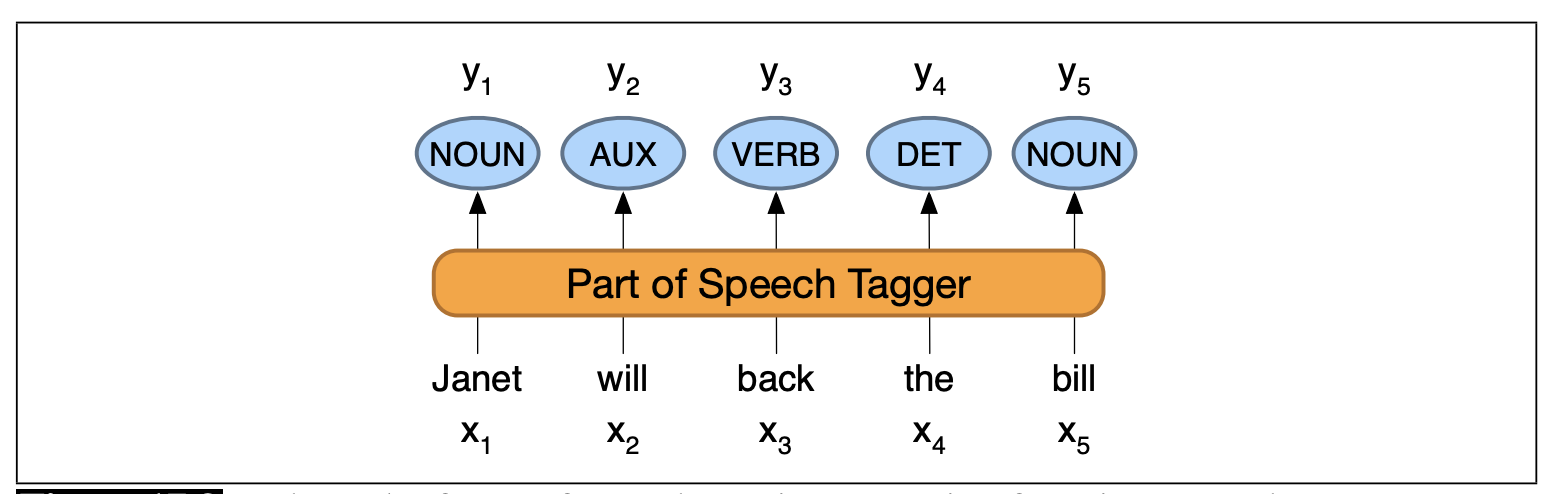

Le principal défi de l'étiquetage est de résoudre l'**ambiguïté**. Un même mot peut appartenir à plusieurs catégories grammaticales selon son contexte. Le but est de choisir la bonne étiquette pour chaque situation.

**Exemples en français :**

> Le mot **"marche"** peut être :
> * Un **verbe** : *Il **marche** rapidement.*
> * Un **nom** : *La dernière **marche** de l'escalier.*

> Le mot **"que"** peut être :
> * Un **pronom interrogatif** : ***Que** dis-tu ?*
> * Une **conjonction de subordination** : *Je pense **que** tu as raison.*

Le but d'un étiqueteur morpho-syntaxique est donc de **résoudre ces ambiguïtés** en se basant sur le contexte de la phrase pour assigner l'étiquette la plus probable.


### 🔍 À vous de jouer !

Continuer le code pour montrer les informations sur chaque token en utilisant:
- .pos_
- .lemma_
- .morph

In [ ]:
nlp = spacy.load("fr_core_news_lg")


doc = nlp(u"Parfois, à peine ma bougie éteinte, mes yeux se fermaient si vite que je n’avais pas le temps de me dire : « Je m’endors. »")

print("ID\tFORM\tLEMMA\tUPOS")
for token in doc:
    if not token.is_space:
        print(
            f"{token.i+1}\t"
            f"{token.text}\t"
            f"{token.}\t" #Lemme
            f"{token}\t" #POS
            f"{token}\t" #Morph
        )


<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
nlp = spacy.load("fr_core_news_sm")


doc = nlp(u"Parfois, à peine ma bougie éteinte, mes yeux se fermaient si vite que je n’avais pas le temps de me dire : « Je m’endors. »")

print("ID\tFORM\tLEMMA\tUPOS")
for token in doc:
    if not token.is_space:
        print(
            f"{token.i+1}\t"
            f"{token.text}\t"
            f"{token.lemma_}\t"
            f"{token.pos_}\t"
            f"{token.morph}"
        )
````


### Analyse léxicométrique du texte

Grâce à ces méthodes, on peut écrire des fonctions pour étudier les textes. Regardons les fonctions suivantes, écrites pour analyser le texte de livre "Voyage au bout de la nuit" stocké auparavant dans une variable "content"

In [ ]:
from collections import Counter
from typing import Dict, List, Tuple

def analyze_linguistic_features(doc: spacy.tokens.Doc,
                                top_n_pos: int = 10,
                                top_n_morph: int = 10,
                                top_n_lemmas: int = 20,
                                filter_stopwords: bool = False) -> Dict:
    """
    Analyse les caractéristiques linguistiques d'un document spaCy.

    Args:
        doc: Document spaCy traité
        top_n_pos: Nombre des principales balises POS (Partie du Discours) à afficher
        top_n_morph: Nombre des principales caractéristiques morphologiques à afficher
        top_n_lemmas: Nombre des lemmes les plus fréquents à afficher
        filter_stopwords: Indique s'il faut exclure les mots vides (stopwords) du comptage des lemmes

    Returns:
        Dictionnaire contenant tous les résultats de l'analyse
    """
    pos_counts = Counter()
    morph_counts = Counter()
    lemma_counts = Counter()

    total_tokens = 0

    for token in doc:
        if token.is_space: # Si le token est un espace, on passe au suivant
            continue

        total_tokens += 1

        pos_counts[token.pos_] += 1 # Comptage des balises POS

        if token.morph: # Si le token a des caractéristiques morphologiques
            for feature in str(token.morph).split('|'):
                if feature.strip(): # On gère les espaces blancs
                    morph_counts[feature.strip()] += 1 # Comptage des caractéristiques morphologiques

        # Comptage des lemmes (normalisation en minuscules pour un meilleur regroupement)
        # Exclusion des pronoms génériques (-PRON- est souvent un lemme pour les pronoms)
        if token.lemma_ and token.lemma_ not in  ['-PRON-']:
            # Appliquer le filtrage de la ponctuation et des mots vides pour les lemmes
            if not token.is_punct and (not filter_stopwords or not token.is_stop):
                lemma_counts[token.lemma_.lower()] += 1

    return {
        'pos_counts': pos_counts.most_common(top_n_pos),
        'morph_counts': morph_counts.most_common(top_n_morph),
        'lemma_counts': lemma_counts.most_common(top_n_lemmas),
        'total_tokens': total_tokens
    }

def print_analysis_results(results: Dict, section_name: str = "Document"):
    """Affiche les résultats d'analyse formatés."""

    print(f"--- Statistiques des balises POS pour {section_name} (Top {len(results['pos_counts'])}) ---")
    print(f"Nombre total de jetons (tokens) non-espaces analysés : {results['total_tokens']}")
    for pos, count in results['pos_counts']:
        percentage = (count / results['total_tokens']) * 100
        print(f"{pos:<12}: {count:>6} ({percentage:>5.1f}%)")

    print(f"\n--- Statistiques des caractéristiques morphologiques pour {section_name} (Top {len(results['morph_counts'])}) ---")
    for morph, count in results['morph_counts']:
        percentage = (count / results['total_tokens']) * 100
        print(f"{morph:<20}: {count:>6} ({percentage:>5.1f}%)")

    print(f"\n--- Lemmes les plus fréquents pour {section_name} (Top {len(results['lemma_counts'])}) ---")
    for lemma, count in results['lemma_counts']:
        percentage = (count / results['total_tokens']) * 100
        print(f"{lemma:<15}: {count:>6} ({percentage:>5.1f}%)")

In [ ]:
nlp.max_length = 1500000  # Définir une valeur supérieure à la longueur du texte
livre_celine = content
doc = nlp(livre_celine)

print("===" * 20 + "\n=== ANALYSE DU DOCUMENT ===\n")
results = analyze_linguistic_features(doc)
print_analysis_results(results)

### 🔍 À vous de jouer !

Est-ce que l'analyse vous simple outil ? Est-ce que cela donne vraiment une idée de texte ?

Dans Spacy, on a l'outil 'stop_words', c'est une liste des mots les plus courants d'une langue qu'il est souvent utile de filtrer, par exemple « et » ou « je ».

- Activez 'filter_stopwords=True' pour exclure les mots vides des lemmes
- Eténdez l'analyse pour 'top_n_pos' et 'top_n_morph' à 20.
- Si le temps vous permet, changez la variable "livre_celine" avec vos propres données pour effectuer une analyse. Cette variable est de type "chaîne de caractères".


In [ ]:
nlp.max_length = 1500000
livre_celine = content
doc = nlp(livre_celine)

print("===" * 20 + "\n=== ANALYSE DU DOCUMENT ===\n")
results = analyze_linguistic_features(doc)  # A CHANGER
print_analysis_results(results)

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
# Exécution de l'analyse complète
print("===" * 20 + "\n=== ANALYSE COMPLÈTE DU DOCUMENT ===\n")
results = analyze_linguistic_features(doc, 20, 20, 20, True)
print_analysis_results(results,)


# Pour modifier la variable 'livre_celine'
livre_celine = "VOTRE TEXTE"
doc = nlp(livre_celine)
````


## Visualisation : L'Analyse de Dépendance avec DisplaCy  

Nous allons ici nous concentrer sur DisplaCy pour visualiser la structure de dépendance de quelques phrases extraites du livre.


DisplaCy est le visualiseur intégré de spaCy, conçu pour montrer les dépendances syntaxiques et les entités nommées de manière interactive et visuellement agréable. Il est très utile pour comprendre la structure d'une phrase telle que spaCy l'analyse.

Pour comprendre les grammaires de dépendances, je vous invite à étudier ce site : https://universaldependencies.org/

[Grew Match](https://universal.grew.fr/?corpus=UD_French-Sequoia@2.16#) est un outil de graphes linguistique, c'est une autre façon de visualiser ou de faire de la recherche sur des arbres de dépendances, ou bien des graphes de dépendances.


In [ ]:
from spacy import displacy

# Exemples de phrases pour visualiser
sentence_to_visualize_1 = sentences[100]
sentence_to_visualize_2 = sentences[300]
sentence_to_visualize_3 = sentences[1250]

# Traiter les phrases avec le modèle nlp chargé
doc_viz_1 = nlp(sentence_to_visualize_1)
doc_viz_2 = nlp(sentence_to_visualize_2)
doc_viz_3 = nlp(sentence_to_visualize_3)

# Rendre l'analyse de la dépendance pour la première phrase
print(f"--- Dependency Parse for Sentence 1 ---\n'{sentence_to_visualize_1.strip()}'")
displacy.render(doc_viz_1, style="dep", jupyter=True, options={"distance": 90})

# Rendre l'analyse de la dépendance pour la deuxième phrase
print(f"\n--- Dependency Parse for Sentence 2 ---\n'{sentence_to_visualize_2.strip()}'")
displacy.render(doc_viz_2, style="dep", jupyter=True, options={"distance": 90})

# Rendre l'analyse de la dépendance pour la troisème phrase
print(f"\n--- Dependency Parse for Sentence 3 ---\n'{sentence_to_visualize_3.strip()}'")
displacy.render(doc_viz_3, style="dep", jupyter=True, options={"distance": 90})


## Reconnaissance d'Entités Nommées (NER)

La Reconnaissance d’Entités Nommées (Named Entity Recognition, ou NER) est une tâche du Traitement Automatique des Langues (TAL) qui consiste à identifier les éléments du monde réel mentionnés dans un texte, puis à les classer en catégories telles que :

- PER : personnes (ex. : Céline, Napoléon)

- LOC : lieux géographiques (ex. : Paris, Seine)

- ORG : organisations (ex. : ONU, Sorbonne)

- MISC : autres entités nommées (ex. : titres d’œuvres, événements, objets culturels)

Les modèles NER pré-entraînés de spaCy sont particulièrement efficaces pour cette tâche, car ils ont été entraînés sur de vastes corpus de textes annotés.

In [ ]:
# Example sentences to visualize
sentence_to_visualize_1 = sentences[72]
sentence_to_visualize_2 = sentences[80]
sentence_to_visualize_3 = sentences[96]

# Process the sentences with the loaded nlp model
doc_viz_1 = nlp(sentence_to_visualize_1)
doc_viz_2 = nlp(sentence_to_visualize_2)
doc_viz_3 = nlp(sentence_to_visualize_3)

for i, (sentence, doc) in enumerate([
    (sentence_to_visualize_1, doc_viz_1),
    (sentence_to_visualize_2, doc_viz_2),
    (sentence_to_visualize_3, doc_viz_3)
], start=1):
    print(f"\n--- Named Entities for Sentence {i} ---\n")
    displacy.render(doc, style="ent", jupyter=True)

    if doc.ents:
        print("Entities found:")
        for ent in doc.ents:
            print(f"  - Entity: {ent.text}, Type: {ent.label_}, Explanation: {spacy.explain(ent.label_)}")
    else:
        print("  No named entities found in this sentence.")


Appliquons le **NER** aux phrases de votre livre de Céline. Nous allons prendre les 3000 premières phrases et extraire les entités nommées qu'elles contiennent.



In [ ]:
# Dictionary to store counts of each entity type
entity_type_counts = {}

# Iterate over the first 3000 sentences
for i, sentence in enumerate(sentences[:3000]):
    doc_sentence = nlp(sentence)
    if doc_sentence.ents: # Check if any entities are found in the sentence
        for ent in doc_sentence.ents:
            entity_type_counts[ent.label_] = entity_type_counts.get(ent.label_, 0) + 1

print("\n--- Named Entity Type Statistics ---")
# Sort entity types by count in descending order
sorted_entity_types = sorted(entity_type_counts.items(), key=lambda item: item[1], reverse=True)
for ent_type, count in sorted_entity_types:
    print(f"{ent_type}: {count}")

### 🔍 À vous de jouer !

Choisissez une ou plusieurs phrases et testez-les manuellement :

- spaCy détecte-t-il correctement toutes les entités ?

- Y a-t-il des erreurs de type ou des entités oubliées ?

- Pouvez-vous expliquer pourquoi cela se produit ?




In [ ]:
text = "VOTRE TEXTE"

doc = nlp(text)

print("ID\tFORM\tLEMMA\tUPOS\tMORPH\tENT_TYPE")
for token in doc:
  if token.ent_type_:
    if not token.is_space:
        print(
            f"{token.i+1}\t"
            f"{token.text}\t"
            f"{token.lemma_}\t"
            f"{token.pos_}\t"
            f"{token.morph}\t"
            f"{token.ent_type_}"
        )


<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
text = "Lors de la conférence de presse tenue par le célèbre PDG de Google, Sundar Pichai, à Berlin, le 15 juin 2024, il a annoncé des innovations majeures pour l'UE."

````


# Recherche de Motifs : Le Matcher

Le RuleMatcher permet de définir des motifs de tokens spécifiques via des attributs (`TEXT`, `LEMMA`, `POS`, `IS_ALPHA`, `IS_PUNCT`, etc.). Il est plus flexible que les expressions régulières (regex) car il opère sur les tokens et leurs attributs linguistiques.



**Regex vs. RuleMatcher**

| Critère                                  | Regex (Expressions régulières)                                   | RuleMatcher (spaCy)                                                          |
| ---------------------------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **Type d'entrée**                        | Chaînes de caractères brutes                                     | Objets `Doc` de spaCy (texte pré-analysé)                                    |
| **Principe de fonctionnement**           | Correspondance de motifs textuels simples                        | Correspondance de motifs linguistiques sur des tokens                        |
| **Utilisation du contexte linguistique** | Aucune (travaille sur les caractères uniquement)                 | Oui (utilise lemme, POS, entités nommées, etc.)                              |
| **Souplesse**                            | Rigide (ex. difficile de distinguer "Apple" fruit vs entreprise) | Plus souple grâce à l'accès aux attributs linguistiques                      |
| **Cas d’usage typique**                  | Numéros de téléphone, adresses e-mail, motifs fixes              | Expressions nommées, motifs syntaxiques, entités selon leur rôle grammatical |
| **Niveau de complexité**                 | Simple à modéré                                                  | Modéré à avancé                                                              |
| **Performance**                          | Très rapide sur du texte brut                                    | Légèrement plus coûteux (nécessite un pipeline NLP préalable)                |
| **Langage de définition**                | Syntaxe de regex (ex: `\d{3}-\d{3}-\d{4}`)                       | Dictionnaires de motifs (JSON-like avec clés `TEXT`, `LEMMA`, `POS`, etc.)   |



Les motifs sont des listes de dictionnaires. Chaque dictionnaire représente un token et spécifie ses attributs linguistiques. `{"LEMMA": "acheter", "POS": "VERB"}` recherche un token dont le lemme est 'acheter' et la partie du discours est un verbe. L'opérateur OP: '?' rend un token optionnel (0 ou 1 occurrence).

Utilisez les opérateurs pour spécifier le nombre d'occurrences.

| Exemple       | Description                              |
| ------------- | ---------------------------------------- |
| `{"OP": "!"}` | Négation : correspond à **0 fois**       |
| `{"OP": "?"}` | Optionnel : correspond à **0 ou 1 fois** |
| `{"OP": "+"}` | Correspond à **1 ou plusieurs fois**     |
| `{"OP": "*"}` | Correspond à **0 ou plusieurs fois**     |


```python
pattern = [
    {"LEMMA": "acheter", "POS": "VERB"},
    {"POS": "DET"},
    {"POS": "ADJ", "OP": "?"}, # optionnel : trouve 0 or 1 fois
    {"POS": "NOUN"}
]


**Rule Matcher en action : Lever l'ambiguïté lexicale**

Le Rule Matcher aide à distinguer "travailler quelque part" de "travailler pour une entreprise". Le motif est le verbe 'travailler' suivi d'une préposition, puis d'une entité d'organisation. Le Rule Matcher identifie correctement les phrases impliquant une organisation.



In [ ]:
import spacy
from spacy.matcher import Matcher
import re

nlp = spacy.load("fr_core_news_md")
matcher = Matcher(nlp.vocab)

text = (
    "Je travaille chez Google. Elle travaille pour Microsoft. " # ✅
    "Ils travaillent avec l'ONU. " # ❌
    "Il travaille dans un bureau. " # ❌
    "Nous travaillons dur tous les jours." # ❌
    "Le travail de Marie est très juste." # ❌
)

doc = nlp(text)

# Pattern : verbe 'travailler' + une préposition + une entité ORG
pattern = [
    {"LEMMA": "travailler", "POS": "VERB"},
    {"POS": "ADP"},  # préposition (chez, pour, avec)
    {"ENT_TYPE": "ORG"},  # organisation
]

matcher.add("TRAVAILLER_ORG", [pattern])
matches = matcher(doc)

print("\n📊 SpaCy Matcher (verbe + ORG) :")
for match_id, start, end in matches:
    span = doc[start:end]
    print(f" - '{span.text}' (entité ORG: {span[-1].text})")

# Regex simpliste qui ne peut pas détecter les ORG ni la structure :
import re
regex = r"\btravaill\w*\b"

print("\n📊 Regex (verbe 'travailler') :")
for m in re.finditer(regex, doc.text, re.IGNORECASE):
    print(f" - '{m.group()}'")


### 🔍 À vous de jouer !

- Trouver les verbes au **passé composé**.  

Trouvez les verbes au passé composé dans le texte. Définissez le motif pour un verbe auxiliaire (avoir ou être) suivi d'un participe passé. Utilisez `LEMMA` et `POS` pour l'auxiliaire, et `MORPH` avec `IS_SUPERSET` pour le participe passé (`VerbForm=Part` et `Tense=Past`).



In [ ]:
matcher = Matcher(nlp.vocab)

pattern_passe_compose = [
    {"LEMMA": {"IN": []}, "POS": ""}, # A CHANGHER
    {"POS": "VERB", "MORPH": {"IS_SUPERSET": ["VerbForm=", "Tense="]}} # A CHANGHER
]

doc2 = nlp(str(sentences[:100]))
matcher.add("PASSE_COMPOSE", [pattern_passe_compose])
matches = matcher(doc2)

for _, start, end in matches:
    print(f" - '{doc2[start:end].text}'")

matcher.remove("PASSE_COMPOSE")

<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
matcher = Matcher(nlp.vocab)
pattern_passe_compose = [
    {"LEMMA": {"IN": ["avoir", "être"]}, "POS": "AUX"},
    {"POS": "VERB", "MORPH": {"IS_SUPERSET": ["VerbForm=Part", "Tense=Past"]}}
]
doc2 = nlp(str(sentences[:100]))
matcher.add("PASSE_COMPOSE", [pattern_passe_compose])
matches = matcher(doc2)

for _, start, end in matches:
    print(f" - '{doc2[start:end].text}'")

matcher.remove("PASSE_COMPOSE")


````


### 🔍 À vous de jouer !

Trouver les **groupes nominaux avec adjectifs**:


- Adjectif(s) + Nom : magnifique interface, petite application utile
- Nom + Adjectif(s) : interface magnifique, application utile et rapide

Et ignorer les autres cas qui n’appartiennent pas à des groupes nominaux directs (par exemple : utile et rapide, magnifique, mais trop cher, etc.).





In [ ]:
from spacy.matcher import Matcher
import spacy
from spacy.util import filter_spans

nlp = spacy.load("fr_core_news_lg")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Une magnifique interface intuitive a été conçue."                 # ✅ ADJ+ADJ+NOUN
    "Il utilise une technologie complexe."                             # ✅ ADJ+NOUN
    "Cette solution, utile et rapide, me plaît beaucoup."              # ❌ pas un groupe nominal contigu
    "Les résultats sont beaux et prometteurs."                         # ❌ pas un GN, ce sont des adjectifs liés à un verbe
    "Quelqu'un vous a remarquée qui est dans une grande limousine noire." # ✅ ADJ+NOUN+ADJ
    "vous êtes, par ailleurs, responsable du développement des vaccins contre les maladies virales émergentes dans un laboratoire." # ✅ NOUN+ADJ+ADJ
    "D'autres réseaux sociaux thématiques devraient voir le jour prochainement." # ✅ ADJ+NOUN+ADJ+ADJ

)

pattern_adj_noun_adj = [
    {"POS": "", "OP": ""}, # A CHANGER
    {"POS": "NOUN"},
    {"POS": "", "OP": ""}, # A CHANGER
]

pattern_noun_adj = [
    {"POS": "", "OP": ""}, # A CHANGER
    {"POS": "NOUN"},
    {"POS": "", "OP": ""},# A CHANGER
]

matcher.add("ADJ_NOUN_ADJ", [pattern_adj_noun_adj])
matcher.add("NOUN_ADJ", [pattern_noun_adj])

matches = matcher(doc)
spans = [doc[start:end] for match_id, start, end in matches]

filtered_spans = filter_spans(spans)
for span in filtered_spans:
    print(f"⤷ {span.text}")


<details>
<summary>💡 Besoin d'aide ? Cliquez ici pour afficher la solution</summary>

```python
from spacy.matcher import Matcher
import spacy
from spacy.util import filter_spans

nlp = spacy.load("fr_core_news_lg")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Une magnifique interface intuitive a été conçue."                 # ✅ ADJ+ADJ+NOUN
    "Il utilise une technologie complexe."                             # ✅ ADJ+NOUN
    "Cette solution, utile et rapide, me plaît beaucoup."              # ❌ pas un groupe nominal contigu
    "Les résultats sont beaux et prometteurs."                         # ❌ pas un GN, ce sont des adjectifs liés à un verbe
    "Quelqu'un vous a remarquée qui est dans une grande limousine noire." # ✅ ADJ+NOUN+ADJ
    "vous êtes, par ailleurs, responsable du développement des vaccins contre les maladies virales émergentes dans un laboratoire." # ✅ NOUN+ADJ+ADJ
    "D'autres réseaux sociaux thématiques devraient voir le jour prochainement." # ✅ ADJ+NOUN+ADJ+ADJ

)


pattern_adj_noun_adj = [
    {"POS": "ADJ", "OP": "+"},
    {"POS": "NOUN"},
    {"POS": "ADJ", "OP": "*"},
]

pattern_noun_adj = [
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN"},
    {"POS": "ADJ", "OP": "+"},
]

matcher.add("ADJ_NOUN_ADJ", [pattern_adj_noun_adj])
matcher.add("NOUN_ADJ", [pattern_noun_adj])

matches = matcher(doc)
spans = [doc[start:end] for match_id, start, end in matches]

filtered_spans = filter_spans(spans)
for span in filtered_spans:
    print(f"⤷ {span.text}")


````


**Bonus**

Faites la requête suivante sur Grew Match pour trouver le pattern :


```
pattern {
  N [upos=NOUN];
  A1 [upos=ADJ];
  A2 [upos=ADJ];
  N -[amod]-> A1;
  N -[amod]-> A2;

}
```



https://universal.grew.fr/?corpus=UD_French-Rhapsodie@2.16#

# Word Embeddings : comprendre les relations entre les mots

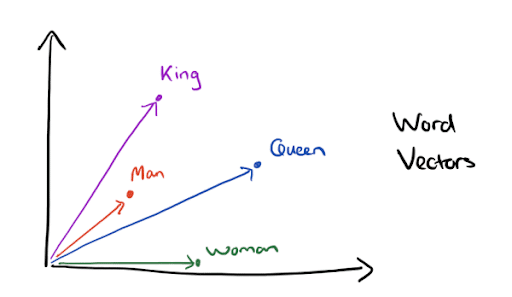



Les *word embeddings* (ou plongements lexicaux) représentent les mots sous forme de vecteurs dans un espace à plusieurs dimensions.

Pourquoi c’est utile :

- **Proximité sémantique** : les mots proches en sens ont des vecteurs proches.
- **Relations vectorielles** : par exemple  
  `king - man + woman ≈ queen`
- **Utilisation en NLP** : classification, traduction, recherche...

👉 Les modèles spaCy `md` et `lg` contiennent des vecteurs pré-entraînés.

Les modèles `sm` (small) ne le permettent pas.


In [ ]:
nlp = spacy.load("en_core_web_lg")

word1 = nlp("king").vector
word2 = nlp("man").vector
word3 = nlp("woman").vector

print(f"Vecteur pour word1 (10 premières dimensions) : {word1[:10]}")
print(f"Vecteur pour word2 (10 premières dimensions) : {word2[:10]}")
print(f"Vecteur pour word3 (10 premières dimensions) : {word3[:10]}")


## Doc.similarity() : mesurer la proximité sémantique

La méthode similarity() permet d’estimer la similarité entre deux objets linguistiques : mots, phrases, ou documents.


In [ ]:
animal = nlp("chat")[0]
vehicle = nlp("voiture")[0]
tool = nlp("marteau")[0]
orange = nlp("orange")[0]
lemon = nlp("citron")[0]

# Token similarity
animal_vehicle_sim = animal.similarity(vehicle)
vehicle_tool_sim = vehicle.similarity(tool)
orange_animal_sim = orange.similarity(animal)
orange_apple_sim = orange.similarity(lemon)

print("\n--- Similarité entre tokens ---")
print(f"Similarité entre 'orange' et 'pomme' :  {orange_apple_sim:.4f}")
print(f"Similarité entre 'orange' et 'chat' : {orange_animal_sim:.4f}")
print(f"Similarité entre 'voiture' et 'marteau' : {vehicle_tool_sim:.4f}")
print(f"Similarité entre 'chat' et 'voiture' : {animal_vehicle_sim:.4f}")



### 🔍 À vous de jouer !


- Executez la cellule pour afficher les paires de phrases et leur score de similarité.
- Si vous avez le temps, voyez le Bonus pour faire une analyse sur les phrases du livre de Céline.


In [ ]:
# Phrases sémantiquement similaires
sentence_animal_love1 = nlp("J'aime mon chien.")
sentence_animal_love2 = nlp("J'adore les chats.")

sentence_pet_care = nlp("Prendre soin d'un animal de compagnie est important.")

# Phrases sémantiquement différentes
sentence_car_repair = nlp("La voiture est en panne, il faut la réparer.")
sentence_cooking = nlp("Je prépare un délicieux dîner avec des légumes.")

print("\n--- Similarité entre phrases simples et ciblées ---")
print(f"Similarité entre 'J'aime mon chien.' et 'J'adore les chats.' : {sentence_animal_love1.similarity(sentence_animal_love2):.4f}")
print(f"Similarité entre 'J'aime mon chien.' et 'Prendre soin d'un animal de compagnie est important.' : {sentence_animal_love1.similarity(sentence_pet_care):.4f}")
print(f"Similarité entre 'J'aime mon chien.' et 'La voiture est en panne, il faut la réparer.' : {sentence_animal_love1.similarity(sentence_car_repair):.4f}")
print(f"Similarité entre 'La voiture est en panne, il faut la réparer.' et 'Je prépare un délicieux dîner avec des légumes.' : {sentence_car_repair.similarity(sentence_cooking):.4f}")

<details>
<summary>💡 Bonus</summary>
Si on veut trouver les phrases les plus similaires dans le livre 'Voyage au bout de la nuit de Céline', on peut imaginer une anamyse pareille :

```python
nlp = spacy.load("fr_core_news_lg")
nlp.max_length = 1_500_000
doc = nlp(content)

def is_valid(sent):
    return sent.vector_norm != 0 and len(sent.text.strip()) > 3

valid_sentences = []
for sent in doc.sents:
    if is_valid(sent):
        valid_sentences.append(sent)
    if len(valid_sentences) == 200:
        break

best_pairs = []
for i in range(len(valid_sentences)):
    for j in range(i + 1, len(valid_sentences)):
        sim = valid_sentences[i].similarity(valid_sentences[j])
        best_pairs.append(((i, j), sim))

best_pairs.sort(key=lambda x: x[1], reverse=True)

for (i, j), score in best_pairs[:10]:
    print(f"\n--- Similarité : {score:.4f}")
    print(f"Phrase {i} : {valid_sentences[i].text.strip()}")
    print(f"Phrase {j} : {valid_sentences[j].text.strip()}")

````

</summary>

# Bonus : Personnalisation segmentation de spaCy pour une langue peu dotée : le Saramaca

## Modèles statistiques vs. modèle vide




| Caractéristique        | `spacy.blank("fr")`                 | `spacy.load("fr_core_news_sm")`   |
| ---------------------- | ----------------------------------- | --------------------------------- |
| Modèle pré-entraîné    | ❌ Non                               | ✅ Oui                             |
| Règles de tokenisation | ✅ De base                           | ✅ Règles spécifiques + exceptions |
| Vitesse                | ⚡ Très rapide                       | 🐢 Un peu plus lent               |
| Idéal pour             | Entraînement perso, expérimentation | Usage immédiat, production NLP    |
| Exemple d’usage        | Recherche, domaine spécialisé       | Analyse de texte généraliste      |




- **Langue ciblée :** Saramaca, créole à base anglo-portugaise de Guyane française, peu dotée en ressources NLP.  
- **Problème :** Peu ou pas de modèles pré-entraînés ni données annotées.  
- **Solution spaCy :**  
  - `spacy.blank("xx")` = modèle vide, personnalisable à volonté.  
  - Personnalisation du **segmenteur de phrases** (`senter`).  
- **Deux approches pour segmenter :**  
  1. Par règles (ex : ponctuation) → simple mais insuffisant pour le Saramaca.  
  2. Par apprentissage automatique → nécessite des données annotées, plus performant.  
- **Démonstration :**  
  - Le segmentateur par règles échoue sur Saramaca.  
  - Un entraînement sur une dizaine de phrases améliore nettement la segmentation.



  Source : [article](https://aclanthology.org/2024.naacl-long.170.pdf)

In [ ]:
data = [
    "KUMAFA u bi luku a di woto di pasa, nöö Didibi bi taki wan soni u lei taa Jehovah an abi di leti u tii libisëmbë",
    "A taki taa Jehovah an ta tii a wan leti fasi, söseei taa libisëmbë bi o möön dë waiwai te de bi o ta tii deseei",
    "De bi o ta möön piizii möön te Gadu bi o ta tii de u? I bi o ta möön piizii ee i bi sa libi u teego söndö u Gadu ta tii i ö?",
    "JEHOVAH HËN ABI DI LETI U TII",
    "Faandi mbei dee soni dee Gadu buta taa a o du ta bunu hii juu?",
    "Hii fa dee soni aki bi ta pasa, tökuseei Jehovah bi ta buta pakisei a hiniwan u de apaiti ",
    "Jesosi bi taki taa: 'Ja musu begi na wan oto soni a mundu möön leki Gadu i Masa [Jehovah i Gadu, NW ]",
    "Söseei ee wan sëmbë ja ta lobi di otowan fii, nöö ja dë Masa Gadu mii tu…",
    'Di Bëibel taa: "Hën [Jesosi] nöö sa puu sëmbë a hogi basu…Oto në an dë a goonliba aki möönsö di u libisëmbë sa kai fuu feni di heepi u Gadu” (Tjabukama 4:12)',
    "Dee gaanwomi aki nango makandi ku dee woto gaanwomi u di kemeente a dee baaa ku sisa u da de taanga, söseei de ta hoi taki di ta da u degihati a dee kemeente komakandi ku dee gaan komakandi"
]

text_srm = " ".join(data)

nlp = spacy.blank("xx") # "xx" = langue inconnue/générique

# 2. Ajouter le composant "sentencizer" au pipeline.
nlp.add_pipe("sentencizer")

# 3. Traiter le texte avec le pipeline spaCy
doc = nlp(text_srm)

# 4. Itérer sur les phrases détectées et les afficher
print("--- Phrases détectées dans le texte ---")
for i, sent in enumerate(doc.sents, 1):
    print(f"Phrase {i}: {sent.text.strip()}")

print("\n--- Analyse ---")
print(f"Spacy a identifié {len(list(doc.sents))} de 10 phrases dans le texte.")

In [ ]:
import spacy
from spacy.training import Example
import random
from spacy.util import minibatch


# --- 1. PRÉPARATION DES DONNÉES ---

# Les données d'entraînement CORRECTES sont une liste de phrases complètes.

# Le texte pour les TESTS est une seule chaîne jointe.
TEST_TEXT = " ".join(data)

# --- 2. LE PIPELINE D'ENTRAÎNEMENT AMÉLIORÉ ---

def train_upgraded_segmenter(train_data, iterations=100, batch_size=4):
    """Entraîne un modèle de segmentation de phrases plus robuste."""
    nlp = spacy.blank("xx")
    senter = nlp.add_pipe("senter")

    examples = []
    for sentence_text in train_data:
        doc = nlp.make_doc(sentence_text)
        annotations = {"sent_starts": [1] + [0] * (len(doc) - 1)}
        examples.append(Example.from_dict(doc, annotations))

    optimizer = nlp.initialize(get_examples=lambda: examples)

    print("--- Début de l'entraînement amélioré ---")
    for i in range(iterations):
        random.shuffle(examples)
        losses = {}

        # **AMÉLIORATION 3 : Utilisation du batching**
        for batch in minibatch(examples, size=batch_size):
            nlp.update(batch, sgd=optimizer, losses=losses)

        if (i + 1) % 20 == 0:
            print(f"Itération {i + 1}/{iterations}, Perte : {losses['senter']:.4f}")

    print("--- Entraînement terminé ! ---")
    return nlp

# **AMÉLIORATION 2 : Augmentation des données par duplication**
# Nous avons maintenant 100 exemples au lieu de 10, renforçant les motifs.
TRAIN_DATA_AUGMENTED = data * 10

# Entraînement du modèle avec le pipeline amélioré
# **AMÉLIORATION 1 : Plus d’itérations (gérées dans la fonction)**
nlp_after = train_upgraded_segmenter(TRAIN_DATA_AUGMENTED)


# --- 3. TEST DU MODÈLE FINAL ---
print("\n--- Test du modèle amélioré sur le texte complet ---")

doc_after = nlp_after(TEST_TEXT)

print("\nPhrases détectées par notre modèle amélioré :")
sents_after = list(doc_after.sents)
for i, sent in enumerate(sents_after, 1):
    print(f"  Phrase {i} : {sent.text.strip()}")

print(f"\nRésultat : Le modèle a trouvé {len(sents_after)} phrase(s).")

if len(sents_after) == len(data):
    print("\n✅ Succès ! Le modèle a correctement identifié toutes les limites de phrases.")
else:
    print(f"\n❌ Ce n’est pas encore parfait. {len(sents_after)} phrases trouvées au lieu de {len(data)}. Cela illustre la difficulté d’entraîner un modèle avec un jeu de données très réduit.")


# Ressources

* **POS tagging** : [Speech and Language Processing, Chapter 17](https://web.stanford.edu/~jurafsky/slp3/17.pdf)
* **Grew Match tutorial** : [Universal Grew](https://universal.grew.fr/?corpus=UD_English-ParTUT@2.16)
* **Cours officiel de Spacy (gratuit)** : [Advanced NLP with spaCy](https://course.spacy.io/en)
* **Syntaxe théorique et formelle (Volume 1)** : *Modélisation, unités structures* par Sylvain Kahane et Kim Gerdes - [Language Science Press](https://langsci-press.org/catalog/book/241)